# Import Libraries

In [467]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
print("Setup complete.")

Setup complete.


# Reading Data

In [468]:
health_data = pd.read_csv("health_train.csv")
health_data 

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,PA1001,1406,145.0,F,0.005,0.000,0.002,0.000,0.0,0.000,...,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,Low risk
1,PA1002,258,127.0,M,0.012,0.000,0.008,0.004,0.0,0.000,...,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,Low risk
2,PA1003,479,145.0,F,0.000,0.000,0.000,0.002,0.0,0.000,...,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,Low risk
3,PA1004,906,146.0,F,0.004,0.000,0.005,0.003,0.0,0.000,...,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,Low risk
4,PA1005,1921,140.0,F,0.002,0.003,0.006,0.006,0.0,0.000,...,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,PA2580,2077,130.0,M,0.005,0.001,0.001,0.000,0.0,0.000,...,127.0,158.0,2.0,0.0,139.0,139.0,140.0,3.0,0.0,Low risk
1580,PA2581,664,138.0,F,0.000,0.003,0.003,0.000,0.0,0.002,...,69.0,187.0,10.0,1.0,142.0,130.0,140.0,61.0,0.0,Moderate risk
1581,PA2582,1431,144.0,F,0.000,0.000,0.006,0.000,0.0,0.000,...,139.0,169.0,2.0,0.0,157.0,155.0,157.0,2.0,0.0,Moderate risk
1582,PA2583,630,134.0,F,0.017,0.002,0.004,0.000,0.0,0.000,...,50.0,170.0,5.0,0.0,160.0,150.0,155.0,28.0,1.0,Low risk


Low risk         1235
Moderate risk     219
High risk         130
Name: target, dtype: int64

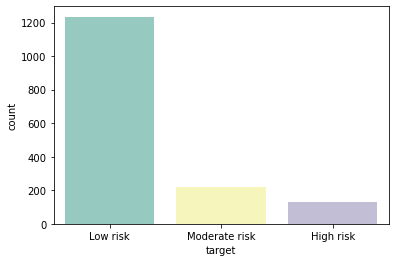

In [469]:
ax = sns.countplot(x="target", data=health_data, palette="Set3")
health_data.target.value_counts()

# Summary of the variables or features

In [470]:
health_data.shape

(1584, 26)

### Column names & Datatypes

In [471]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1584 non-null   object 
 1   x1      1584 non-null   int64  
 2   x2      1584 non-null   float64
 3   x3      1584 non-null   object 
 4   x4      1584 non-null   float64
 5   x5      1540 non-null   float64
 6   x6      1584 non-null   float64
 7   x7      1584 non-null   float64
 8   x8      1567 non-null   float64
 9   x9      1584 non-null   float64
 10  x10     1557 non-null   float64
 11  x11     1584 non-null   float64
 12  x12     1584 non-null   float64
 13  x13     1584 non-null   float64
 14  x14     1584 non-null   object 
 15  x15     1584 non-null   float64
 16  x16     1584 non-null   float64
 17  x17     1584 non-null   float64
 18  x18     1584 non-null   float64
 19  x19     1584 non-null   float64
 20  x20     1584 non-null   float64
 21  x21     1584 non-null   float64
 22  

In [472]:
health_data.dtypes.value_counts()

float64    21
object      4
int64       1
dtype: int64

### Creating numerical and categorical lists

In [473]:
num_list= ["x1","x2","x4","x5","x6","x7","x8","x9","x10","x11","x12","x13","x15","x16","x17","x18","x19","x20","x21","x22","x23","x24"]
cat_list= ["x3","x14"]

### Handling numerical data

In [474]:
numerical_healthdata=health_data[num_list].describe()
numerical_healthdata

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
count,1584.000000,1584.000000,1584.000000,1540.000000,1584.000000,1584.000000,1567.000000,1584.000000,1557.000000,1584.000000,...,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,1053.188131,133.297980,0.003169,0.009906,0.004347,0.001854,0.000003,0.000157,47.094412,1.337816,...,70.409091,93.496843,163.905934,4.063763,0.324495,137.333965,134.542929,137.935606,18.448232,0.309343
std,615.996716,10.002632,0.003821,0.048627,0.002948,0.002940,0.000050,0.000593,17.269621,0.899092,...,38.993892,29.593370,17.908749,2.950268,0.718499,16.461643,15.729735,14.622680,28.375002,0.615868
min,0.000000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,...,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,523.750000,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,...,36.000000,67.000000,152.000000,2.000000,0.000000,128.000000,125.000000,128.000000,2.000000,0.000000
50%,1049.500000,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,...,68.000000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,1583.250000,141.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,...,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.250000,148.000000,23.000000,1.000000
max,2125.000000,160.000000,0.019000,0.477000,0.014000,0.015000,0.001000,0.005000,86.000000,7.000000,...,176.000000,158.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


In [475]:
for i in num_list:
    numerical_healthdata.loc['median',i]=health_data[i].median()
    numerical_healthdata.loc['missing',i]=health_data[i].isnull().sum()
numerical_healthdata

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
count,1584.000000,1584.000000,1584.000000,1540.000000,1584.000000,1584.000000,1567.000000,1584.000000,1557.000000,1584.000000,...,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,1053.188131,133.297980,0.003169,0.009906,0.004347,0.001854,0.000003,0.000157,47.094412,1.337816,...,70.409091,93.496843,163.905934,4.063763,0.324495,137.333965,134.542929,137.935606,18.448232,0.309343
std,615.996716,10.002632,0.003821,0.048627,0.002948,0.002940,0.000050,0.000593,17.269621,0.899092,...,38.993892,29.593370,17.908749,2.950268,0.718499,16.461643,15.729735,14.622680,28.375002,0.615868
min,0.000000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,...,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,523.750000,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,...,36.000000,67.000000,152.000000,2.000000,0.000000,128.000000,125.000000,128.000000,2.000000,0.000000
50%,1049.500000,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,...,68.000000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,1583.250000,141.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,...,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.250000,148.000000,23.000000,1.000000
max,2125.000000,160.000000,0.019000,0.477000,0.014000,0.015000,0.001000,0.005000,86.000000,7.000000,...,176.000000,158.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000
median,1049.500000,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,...,68.000000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
missing,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,17.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Handling categorical data

In [476]:
categorical_healthdata=health_data[cat_list].describe()
categorical_healthdata


,x3,x14
count,1584,1584
unique,2,8
top,M,O+
freq,842,410


In [477]:
for i in cat_list:
    categorical_healthdata.loc['missing',i]=health_data[i].isnull().sum()
    categorical_healthdata.loc['values',i]=health_data[i].unique()
categorical_healthdata

,x3,x14
count,1584,1584
unique,2,8
top,M,O+
freq,842,410
missing,0,0
values,"[F, M]","[O+, A+, B+, O-, A-, B-, AB-, AB+]"


### Missing values percentage

In [478]:
missingvalue_percent = health_data.isnull().sum()/health_data.shape[0]*100
missingvalue_percent

id        0.000000
x1        0.000000
x2        0.000000
x3        0.000000
x4        0.000000
x5        2.777778
x6        0.000000
x7        0.000000
x8        1.073232
x9        0.000000
x10       1.704545
x11       0.000000
x12       0.000000
x13       0.000000
x14       0.000000
x15       0.000000
x16       0.000000
x17       0.000000
x18       0.000000
x19       0.000000
x20       0.000000
x21       0.000000
x22       0.000000
x23       0.000000
x24       0.000000
target    0.000000
dtype: float64

# Data Pre processing

### Removing unwanted column

In [479]:
health_data.drop(columns='id',axis=1,inplace=True)


### Handling missing values

In [480]:
health_data_new=health_data.fillna(health_data.median())


C:\Users\shwet\AppData\Local\Temp\ipykernel_9184\3617314024.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  health_data_new=health_data.fillna(health_data.median())


### Checking for duplicates

In [481]:
health_data_new[health_data_new.duplicated()]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target


### Finding highly corelated columns

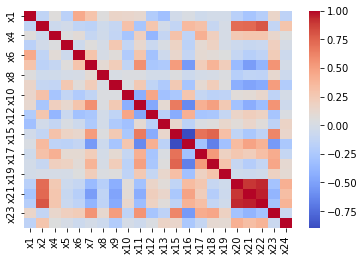

In [482]:
correlation_matrix = health_data_new.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [483]:
high_correlation = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            high_correlation.add(colname)

print("Highly correlated columns:", highly_correlated)


Highly correlated columns: {'x22', 'x16', 'x21'}


In [484]:
health_data_new.drop(columns=['x22', 'x16', 'x21'],axis=1,inplace=True)

### Ordinal encoding on categorical variables

In [485]:
import category_encoders as ce

enc = ce.OrdinalEncoder(cols=['x3','x14','target'],handle_missing='return_nan',return_df= True)

health_data_enc=enc.fit_transform(health_data_new)

type(health_data_enc)
health_data_enc

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x17,x18,x19,x20,x23,x24,target
0,1406,145.0,1.0,0.005,0.000,0.002,0.000,0.0,0.000,46.0,...,8.6,1.0,67.0,171.0,4.0,0.0,155.0,4.0,1.0,1.0
1,258,127.0,2.0,0.012,0.000,0.008,0.004,0.0,0.000,13.0,...,1.3,2.0,138.0,191.0,12.0,1.0,133.0,41.0,0.0,1.0
2,479,145.0,1.0,0.000,0.000,0.000,0.002,0.0,0.000,57.0,...,7.3,1.0,46.0,157.0,1.0,1.0,150.0,6.0,1.0,1.0
3,906,146.0,1.0,0.004,0.000,0.005,0.003,0.0,0.000,29.0,...,7.0,1.0,62.0,169.0,2.0,2.0,150.0,7.0,0.0,1.0
4,1921,140.0,1.0,0.002,0.003,0.006,0.006,0.0,0.000,62.0,...,9.1,3.0,153.0,228.0,9.0,0.0,142.0,20.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,2077,130.0,2.0,0.005,0.001,0.001,0.000,0.0,0.000,72.0,...,4.4,6.0,31.0,158.0,2.0,0.0,139.0,3.0,0.0,1.0
1580,664,138.0,1.0,0.000,0.003,0.003,0.000,0.0,0.002,60.0,...,7.5,3.0,118.0,187.0,10.0,1.0,142.0,61.0,0.0,2.0
1581,1431,144.0,1.0,0.000,0.000,0.006,0.000,0.0,0.000,45.0,...,9.8,4.0,30.0,169.0,2.0,0.0,157.0,2.0,0.0,2.0
1582,630,134.0,1.0,0.017,0.002,0.004,0.000,0.0,0.000,48.0,...,0.0,2.0,120.0,170.0,5.0,0.0,160.0,28.0,1.0,1.0


In [486]:
health_data_enc.dtypes.value_counts()

float64    21
int64       1
dtype: int64

### Outlier handling

In [487]:
health_data_enc.shape

(1584, 22)

In [488]:
from scipy import stats
df=health_data_enc[(np.abs(stats.zscore(health_data_enc)) < 3).all(axis=1)]
df.reset_index(drop=True,inplace=True)

In [489]:
df.dtypes.value_counts()
df.shape

(1323, 22)

1.0    1108
2.0     197
3.0      18
Name: target, dtype: int64

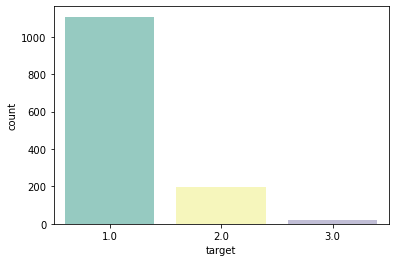

In [490]:
ax = sns.countplot(x="target", data=df, palette="Set3")
df.target.value_counts()

### Balancing the dataset

1.0    1235
2.0     219
3.0     130
Name: target, dtype: int64

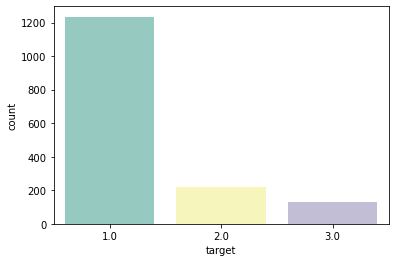

In [491]:
ax = sns.countplot(x="target", data=health_data_enc, palette="Set3")
health_data_enc.target.value_counts()

In [492]:
health_data_enc.shape

(1584, 22)

In [493]:
from sklearn.utils import resample

# Dividing majority and minority classes
major = health_data_enc[health_data_enc.target == 1.0]
minor2 = health_data_enc[health_data_enc.target == 2.0]
minor3 = health_data_enc[health_data_enc.target == 3.0]

# Upsample minority class
minority_upsampled3= resample(minor3,replace=True,n_samples=1235,random_state=42)
minority_upsampled2 = resample(minor2,replace=True,n_samples=1235,random_state=42)                                                                       

In [494]:
# Combine majority and upsampled minority class
df_upsampled3 = pd.concat([major, minority_upsampled3])

# Display count of data points in both class
print(df_upsampled3.target.value_counts())
df_sample.reset_index(drop=True,inplace=True)

1.0    1235
3.0    1235
Name: target, dtype: int64


In [495]:
# Combine majority and upsampled minority class
df_upsampled2 = pd.concat([major, minority_upsampled2])
  
# Display count of data points in both class
print(df_upsampled2.target.value_counts())
df_sample.reset_index(drop=True,inplace=True)

1.0    1235
2.0    1235
Name: target, dtype: int64


In [496]:
df_upsampledt = pd.concat([df_upsampled3, minority_upsampled2])
df_upsampledt.target.value_counts()


1.0    1235
3.0    1235
2.0    1235
Name: target, dtype: int64

1.0    1235
3.0    1235
2.0    1235
Name: target, dtype: int64

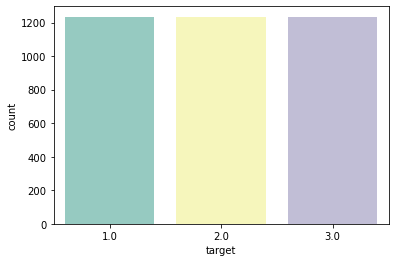

In [497]:
ax = sns.countplot(x="target", data=df_upsampledt, palette="Set3")
df_upsampledt.target.value_counts()

# Model Training

## Supervised Learning

In [498]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_upsampledt.loc[:, df_upsampledt.columns != 'target'], df_upsampledt['target'],
    test_size=0.33, random_state=42)

# Train SVM model
svm_model = svm.SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = tree.DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on test data
svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate model performance using accuracy and precision
svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred, average='macro')
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='macro')
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred, average='macro')

# Print the performance metrics
print("SVM accuracy: ", svm_acc, ", precision: ", svm_prec)
print("Decision Tree accuracy: ", dt_acc, ", precision: ", dt_prec)
print("Random Forest accuracy: ", rf_acc, ", precision: ", rf_prec)

# Identify the model with the highest precision
best_prec = max(svm_prec, dt_prec, rf_prec)
if best_prec == svm_prec:
    print("SVM has the highest precision")
elif best_prec == dt_prec:
    print("Decision Tree has the highest precision")
else:
    print("Random Forest has the highest precision")


SVM accuracy:  0.8724448078495503 , precision:  0.8726361477049118
Decision Tree accuracy:  0.9836467702371219 , precision:  0.9835916724805615
Random Forest accuracy:  0.9918233851185609 , precision:  0.9916998341625208
Random Forest has the highest precision


## k-fold cross validation

In [500]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score


# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(df_upsampledt.loc[:, df_upsampledt.columns != 'target'], df_upsampledt['target'],
    test_size = 0.33, random_state=42)


# Define the classifiers
svm = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

# Train the classifiers on the training data
svm.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# Predict the target values for the test data
svm_pred = svm.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)

# Calculate the precision scores for each classifier
svm_precision = precision_score(y_test, svm_pred, average='weighted')
dtc_precision = precision_score(y_test, dtc_pred, average='weighted')
rfc_precision = precision_score(y_test, rfc_pred, average='weighted')

# Calculate the accuracy scores for each classifier
svm_accuracy = accuracy_score(y_test, svm_pred)
dtc_accuracy = accuracy_score(y_test, dtc_pred)
rfc_accuracy = accuracy_score(y_test, rfc_pred)

# Perform k-fold cross validation and calculate the mean precision scores
svm_cv_precision = cross_val_score(svm, df_upsampledt.loc[:, df_upsampledt.columns != 'target'], df_upsampledt['target'],
 cv=10, scoring='precision_weighted').mean()
dtc_cv_precision = cross_val_score(dtc, df_upsampledt.loc[:, df_upsampledt.columns != 'target'], df_upsampledt['target'],
 cv=10, scoring='precision_weighted').mean()
rfc_cv_precision = cross_val_score(rfc, df_upsampledt.loc[:, df_upsampledt.columns != 'target'], df_upsampledt['target'],
 cv=10, scoring='precision_weighted').mean()

# Perform k-fold cross validation and calculate the mean accuracy scores
svm_cv_accuracy = cross_val_score(svm, df_upsampledt.loc[:, df_upsampledt.columns != 'target'], df_upsampledt['target'],
 cv=10, scoring='accuracy').mean()
dtc_cv_accuracy = cross_val_score(dtc, df_upsampledt.loc[:, df_upsampledt.columns != 'target'], df_upsampledt['target'],
 cv=10, scoring='accuracy').mean()
rfc_cv_accuracy = cross_val_score(rfc, df_upsampledt.loc[:, df_upsampledt.columns != 'target'], df_upsampledt['target'],
 cv=10, scoring='accuracy').mean()

# Print the results in a table
print('Algorithm\t\tPrecision\tAccuracy\tCross-Val Precision\tCross-Val Accuracy')
print('------------------------------------------------------------------------')
print(f'SVM\t\t\t{svm_precision:.4f}\t\t{svm_accuracy:.4f}\t\t{svm_cv_precision:.4f}\t\t\t{svm_cv_accuracy:.4f}')
print(f'Decision Tree\t\t{dtc_precision:.4f}\t\t{dtc_accuracy:.4f}\t\t{dtc_cv_precision:.4f}\t\t\t{dtc_cv_accuracy:.4f}')
print(f'Random Forest\t\t{rfc_precision:.4f}\t\t{rfc_accuracy:.4f}\t\t{rfc_cv_precision:.4f}\t\t\t{rfc_cv_accuracy:.4f}')


Algorithm		Precision	Accuracy	Cross-Val Precision	Cross-Val Accuracy
------------------------------------------------------------------------
SVM			0.7056		0.6582		0.7348			0.6877
Decision Tree		0.9833		0.9828		0.9869			0.9857
Random Forest		0.9920		0.9918		0.9926			0.9919


## Data pre-processing for health_test.csv

In [503]:
#Reading health_test csv
health_data_test = pd.read_csv("health_test.csv")
health_data_test = health_data_test.set_index(health_data_test.columns[0])

#Finding the total null values sum 
health_data_test.isnull().sum()

#Handling the missing values
health_data_test1=health_data_test.fillna(health_data_test.median())

#Checking if there are any duplicates
health_data_test1[health_data_test1.duplicated()]

#Finding over correlated attributes
correlation_matrix = health_data_test1.corr()
high_correlation = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            high_correlation.add(colname)

print("Highly correlated columns:", highly_correlated)


Highly correlated columns: {'x22', 'x16', 'x21'}


C:\Users\shwet\AppData\Local\Temp\ipykernel_9184\493748886.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  health_data_test1=health_data_test.fillna(health_data_test.median())


In [504]:
#Dropping over correlated attributes
health_data_test1.drop(columns=['x22', 'x16', 'x21'],axis=1,inplace=True)


In [510]:
#Categorical attributes converted to numerical using category_encoder
import category_encoders as ce

enc = ce.OrdinalEncoder(cols=['x3','x14'],handle_missing='return_nan',return_df= True)

health_data_enc_test=enc.fit_transform(health_data_test1)
type(health_data_enc_test)
health_data_enc_test

y_testdata= health_data_enc_test
y_testdata

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x17,x18,x19,x20,x23,x24
id,,,,,,,,,,,,,,,,,,,,,
PA3001,767,135,1.0,0.000,0.000,0.000,0.000,0.0,0.0,67.0,...,69,4.6,1.0,76,143,2,0,137,0,1
PA3002,1592,134,1.0,0.000,0.000,0.010,0.000,0.0,0.0,27.0,...,8,26.1,2.0,74,163,7,1,138,13,0
PA3003,1115,122,2.0,0.000,0.000,0.000,0.000,0.0,0.0,19.0,...,0,15.1,2.0,39,142,1,0,120,3,0
PA3004,299,148,1.0,0.000,0.000,0.000,0.000,0.0,0.0,72.0,...,59,4.3,3.0,14,153,1,0,150,0,1
PA3005,1194,133,2.0,0.003,0.000,0.005,0.000,0.0,0.0,38.0,...,0,12.5,4.0,58,171,5,1,150,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA3524,1071,133,2.0,0.001,0.000,0.007,0.004,0.0,0.0,27.0,...,13,11.4,2.0,95,177,4,0,147,43,0
PA3525,364,135,1.0,0.000,0.016,0.002,0.000,0.0,0.0,70.0,...,84,3.5,3.0,9,141,1,0,136,0,0
PA3526,531,142,1.0,0.016,0.060,0.004,0.000,0.0,0.0,38.0,...,0,0.0,1.0,130,198,5,0,180,14,1


## Prediction using Random forest model as it had the best accuracy & precision

In [511]:
rf_pred1 = rf_model.predict(y_testdata)
print(rf_pred1)

[3. 1. 1. 2. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 3. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 1. 1. 1. 1. 1. 3. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2.
 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 3. 1. 2. 1.
 1. 1. 3. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1.
 1. 1. 1. 1. 3. 1. 1. 1. 1. 3. 1. 1. 3. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 2. 1. 1. 1. 1. 1. 1. 1. 3. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 3. 1. 2. 1. 3. 1. 1. 2. 1. 1. 1. 1. 3. 1. 2. 1. 1. 3.
 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 3. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 3. 1. 2. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 1. 1. 3. 1. 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.

In [517]:
#Appending the predicted labels to the test dataset
y_testdata['predicted_target']=rf_pred1
y_testdata['predicted_target']=y_testdata['predicted_target'].map({1:'Low risk',3:'High risk',2:'Moderate risk'})
y_testdata

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x17,x18,x19,x20,x23,x24,predicted_target
id,,,,,,,,,,,,,,,,,,,,,
PA3001,767,135,1.0,0.000,0.000,0.000,0.000,0.0,0.0,67.0,...,4.6,1.0,76,143,2,0,137,0,1,High risk
PA3002,1592,134,1.0,0.000,0.000,0.010,0.000,0.0,0.0,27.0,...,26.1,2.0,74,163,7,1,138,13,0,Low risk
PA3003,1115,122,2.0,0.000,0.000,0.000,0.000,0.0,0.0,19.0,...,15.1,2.0,39,142,1,0,120,3,0,Low risk
PA3004,299,148,1.0,0.000,0.000,0.000,0.000,0.0,0.0,72.0,...,4.3,3.0,14,153,1,0,150,0,1,Moderate risk
PA3005,1194,133,2.0,0.003,0.000,0.005,0.000,0.0,0.0,38.0,...,12.5,4.0,58,171,5,1,150,5,0,Low risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA3524,1071,133,2.0,0.001,0.000,0.007,0.004,0.0,0.0,27.0,...,11.4,2.0,95,177,4,0,147,43,0,Low risk
PA3525,364,135,1.0,0.000,0.016,0.002,0.000,0.0,0.0,70.0,...,3.5,3.0,9,141,1,0,136,0,0,High risk
PA3526,531,142,1.0,0.016,0.060,0.004,0.000,0.0,0.0,38.0,...,0.0,1.0,130,198,5,0,180,14,1,Low risk


In [518]:
#Updating the predictedTarget.csv file with the predicted values
df=pd.read_csv('predictedTarget.csv')
df1=pd.merge(df.id,y_testdata.predicted_target,on='id', suffixes=('_1', '_2'))
df1.head()
df1.to_csv('predictedTarget.csv',index=False)

In [519]:
df1.head()

,id,predicted_target
0,PA3001,High risk
1,PA3002,Low risk
2,PA3003,Low risk
3,PA3004,Moderate risk
4,PA3005,Low risk


## Unsupervised Learning

### Elbow method to identify cluster numbers

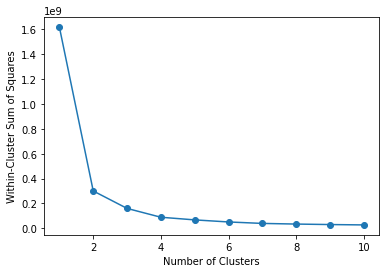

In [308]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Create a range of k values to test
k_values = range(1, 11)

# Fit KMeans models for each k value and extract the within-cluster sum of squares (WCSS)
wcss_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_upsampledt)
    wcss_values.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


C:\Users\shwet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\shwet\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


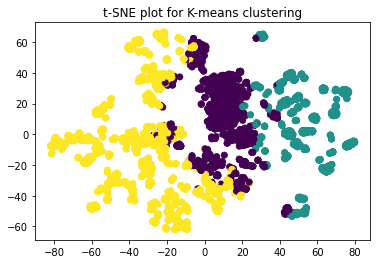

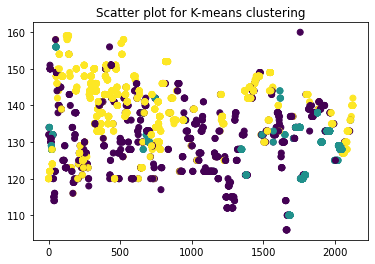

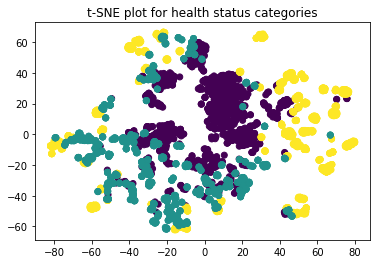

In [318]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# Drop the target variable from the dataset
X = df_upsampledt.drop(['target'], axis=1)

# Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering on the dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Visualize the clusters using t-SNE plots
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.title('t-SNE plot for K-means clustering')
plt.show()

# Visualize the clusters using scatter plots
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.title('Scatter plot for K-means clustering')
plt.show()

# Visualize the different categories of health status
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=df_upsampledt['target'])
plt.title('t-SNE plot for health status categories')
plt.show()




 # END